## Ensemble methond
(https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-11-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-%EB%B0%B0%EA%B9%85Bagging%EA%B3%BC-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting)


여러개의 모델을 조화롭게 학습 시켜 그 모델들의 예측 결과들을 이용하는 것 >> 여러개의 결정트리를 결합하여 하나의 결정트리보다 더 좋은 성능을 내는 머신러닝 기법.*여러개의 약 분류기 (Weak classifier)를 결합하여 강 분류기 (Strong classifier)를 만드는 것*  
*bootstrap : 현재 자료에서 표본을 추출 후 평균을 추정하는 것 . 즉 전체 모집단의 분포를 확실하게 알 수 없는 경우에 표본을 취한 후 그 표본이 전체를 대표한다는 가정하에 전체의 분포를 예측할 수 있게 할 때 사용*   
*결정트리 (decision tree) : 분류와 회귀 모두 가능한 지도 학습 모델 중 하나로 스무 고개 하듯 예/아니오 질문을 이어가며 학습하는 모델*

### bagging (boostrap aggregation) 
훈련 샘플을 여러번 중복 사용하여 훈련  
샘플을 여러 번 뽑아 각 모델을 학습시켜 결과물을 집계(집합)하는 방법  
- 랜덤포레스트 :관련 요소들을 랜덤으로 선정하여 각각의 의사 결정트리를 여러개 생성한 후 의사 결정 트리의 의견을 통합하여 결과를 내는 방법 (https://medium.com/@deepvalidation/title-3b0e263605de)

### boosting 
가중치 활용하여 약 분류기를 강 분류기로 만드는 방법으로 여러개의 독립적인 결정 트리가 각각 값을 예측 한 뒤 그 결과 값을 집계하여 최종 결과 값을 예상하나 모델 결과가 나올 때 데이터에 가중치가 부여되어 부여된 가중치가 다음 모델에 영향을 줌.

### voting classifier
서로 다른 알고리즘이 도출해 낸 결과물에 대하여 최종 투표하는 방식을 사용하여 최종 결과 선택
어떤 훈련 데이터셋에 대해 여러개의 분류기(로지스틱 회귀, SVM, 랜덤 포레스트 등)을 훈련시켰다고 가정했을때
- 직접 투표(hard voting)분류기 : 더 좋은 분류기를 만들기 위해 각 분류기의 예측을 모아 다수결 투표로 정하는 것 (앙상블에 포함된 개별 분류기 중 가장 뛰어난 것보다 정확도가 높은 경우가 많다 > 대수의 법칙) >>결과물에 대한 최종 값을 투표하여 결정  
(분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종 값으로 예측)
- 간접 투표(soft voting)분류기 : 모든 분류기가 범주마다 예측 확률을 예측할 수 있으면 개별 분류기의 예측을 평균하여 가장 높은 범주를 예측할 수 있다. >> 최종 결과물이 나올 확률 값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종 값 도출(default)   
(가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면,class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44, class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4 가 되기 때문에 0 선택)

(*대수의 법칙 : 큰 모집단에서 무작위로 뽑은 표본의 평균이 전체 모집단의 평균과 가까울 가능성이 높다*)  

#### 차이점
- 배깅은 병렬 학습, 부스팅은 순차적 학습(가중치 부여) , 부스팅은 배깅에 비해 에러가 낮아 성능이 좋으나 속도가 느리고 오버 피팅 될 가능성이 있다.
- 개별 결정 트리의 낮은 성능이 문제라면 부스팅 활용, 오버 피팅이 문제면 배깅을 사용

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

# 맷플롯립 한글 폰트 지정
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False


set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

데이터 준비

In [3]:
X,y=make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
log_clf=LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100,random_state=42)
dt_clf=DecisionTreeClassifier(max_depth=3,random_state=42)

LogisticRegression 변수 (데이터 셋에 사용할 LogisticRegression 모델 생성 함수)
1. penalty : 페널티 부여할 때 사용할 기준 결정
2. dual : Dual/Primal Formulation결정
3. tol : 중지 기준에 대한 허용 오차값
4. C : 규칙 강도의 역수 값
5. fit_intercept : 의사 결정 기능에 상수 추가 여부 결정
6. intercept_scailing :
7. class weight : 클래스에 대한 가충지들의 값
8. random_state: 데이터 섞을 때 사용하는 랜덤 번호 생성기의 시드 값
9. solver : 최적화에 사용할 알고리즘 결정
10. max_iter : solver가 수렴하게 만드는 최대 반복 횟수 값
11. multi_class:
12. verbose:
13. warm_start : 이전 호출에 사용했던 solution 재 사용 여부 결정
14. n_jobs : 병렬 처리 할 CPU 코어 수

랜덤포레스트 파라미터

| 파라미터 명 | 설명 |
|---|:---:|
| `n_estimators` | **결정트리의 갯수를 지정** Default = 10 (무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음) | 
| `min_samples_split` | **노드를 분할하기 위한 최소한의 샘플 데이터수** → 과적합을 제어하는데 사용 (Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가) |  
| `min_samples_leaf` | **리프노드가 되기 위해 필요한 최소한의 샘플 데이터수** min_samples_split과 함께 과적합 제어 용도 (불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요) |  
| `max_features` | **최적의 분할을 위해 고려할 최대 feature 개수** Default = 'auto' (결정트리에서는 default가 none이었음) int형으로 지정 →피처 갯수 / float형으로 지정 →비중 sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정 log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정 |  
| `max_depth` | **트리의 최대 깊이** default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할 (깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요) |  
| `max_leaf_nodes` | **리프노드의 최대개수**  |  


결정 트리 파라미터

| 파라미터 명 | 설명 |
|---|:---:|
| `min_samples_split` | **노드를 분할하기 위한 최소한의 샘플 데이터수** → 과적합을 제어하는데 사용 (Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가) |  
| `min_samples_leaf` | **리프노드가 되기 위해 필요한 최소한의 샘플 데이터수** min_samples_split과 함께 과적합 제어 용도 (불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요) |  
| `max_features` | **최적의 분할을 위해 고려할 최대 feature 개수** Default = 'auto' (결정트리에서는 default가 none이었음) int형으로 지정 →피처 갯수 / float형으로 지정 →비중 sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정 log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정 |  
| `max_depth` | **트리의 최대 깊이** default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할 (깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요) |
| `max_leaf_nodes` | **리프노드의 최대개수**  |  

votingclassifier parameter

| 파라미터 명 | 설명 |
|---|:---:|
| `estimators` | **개별 모형 목록** 리스트나 named parameter 형식으로 입력 | 
| `voting` | **hard/soft 선택** |  
| `weights` | **사용자 가중치 리스트** |

### 확인해보기 hard랑 soft 값이 동일하게 나옴?

In [6]:
log_clf=LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100,random_state=42)
dt_clf=DecisionTreeClassifier(max_depth=3,random_state=42)

voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

#voting hard 사용

from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,dt_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [7]:
log_clf=LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100,random_state=42)
dt_clf=DecisionTreeClassifier(max_depth=3,random_state=42)

voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)],voting='soft')
voting_clf.fit(X_train,y_train)

#voting soft 활용

for clf in (log_clf,rnd_clf,dt_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


### OOB(Out of bag) 평가
bagging에서 중복을 허용하여 훈련 데이터셋에서 샘플 수 m 개만큼 서브셋을 선택할 때 샘플로 선택되지 않을 확률은 1-e^(-1) 로 수렴하는데, 이때 선택되지 않은 샘플을 **OOB** 샘플이라고 한다.

**OOB = 한번도 선택되지 않은 표본들**
- 학습 과정에서 oob샘플은 학습하지 않기 때문에 검증 세트나 교차 검증대신 oob 샘플을 이용하여 앙상블 모델 평가가 가능한데 이것을 oob 평가라고 한다

bagging 파라미터

| 파라미터 명 | 설명 |
|---|:---:|
| `base_estimator` | **내가 넣을 모델(예측기)** | 
| `n_estimators` | **모형의 개수** (한개의 예측기한테 몇번의 시행을 할것인가) default=10 |  
| `boostrap` | **데이터 중복 여부** default=True|
| `max_samples` | **하나의 예측기에 들어가는 샘플들이 랜덤으로 몇 퍼센트씩 들어가는지 한계값 결정** 줄일수록 서로 다른 것들을 배운 예측기들이 모일 수 있는 가능성이 높아진다 | 
| `boostrap_features` | **하나의 예측기에 들어가는 샘플에 대해 칼럼의 중복 사용 여부 결정** default=True |  
| `max_features` | **하나의 예측기가 가져갈 수 있는 최대 칼럼 수** |

In [8]:
from sklearn.ensemble import BaggingClassifier
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,bootstrap=True,oob_score=True,random_state=40)
bag_clf.fit(X_train,y_train)

print("oob_score:",bag_clf.oob_score_)#oob 점수 확인

y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

oob_score: 0.8986666666666666


0.912

### boosting 종류
1. AdaBoost : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
2. GBM : AdaBoost에서 가중치 업데이트를 경사 하강법을 이용하는 방식하강법을 이용하는 방식
3. XGBoost : GBM의 단점인 속도와 과적합을 보완하기위해 사용, 병럴 CPU 환경에서 병렬학습 가능하여 GBM보다 빠르게 학습 완료 가능
4. LightGBM : 노드 분할을 리프 중심 분할(leaf-wise)를 사용하여 속도 증가, 하지만 복잡도가 증가하고 과적합 문제 발생 가능 > 이는 max_depth 조정하면 해결 가능

### XGBoost (Extreme Gradient Boosting)
gradient boosting에는 큰 두 문제점 존재 
- 느림
- 과적합(overfitting)이슈 존재  
**단점 보안 위해 XGBoost 사용**   

특징
1. GBM(Gradient Boosting Algorithm)보다 빠름
2. 과적합 방지 가능한 규제 포함
3. CART(Classification And Regression Tree)기반 > 분류 회귀 둘다 가능
4. 조기 종료(early stopping)제공
5. Gradient Boost 기반으로 함 > 즉 앙상블 부스팅의 특징인 가중치 부여를 경사 하강법으로 진행 (gradient descent)  
6. 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능 발휘
7. 속도가 LightGBM에 비해 느림 > 순차적으로 weak learner가 가중치를 증감하는 방법으로 학습키 때문에 전반적으로 속도가 느림. 하지만 병렬 수행 밑 다양한 기능으로 GBM 보다는 빠름
8. 다른 GBM과 마찬가지로 max_depth 파라미터로 분할 깊이 조정하기도 하나 tree pruning으로 더이상 긍정 이득이 없는 분할 가지치기 가능
9. 반복 수행시마다 내부적으로 학습 데이터 셋과 평가 데이터셋에 대한 교차 검증 수행하여 최적화된 반복 수행 횟수 가질 수 있고, 최적화 되면 조기 중단 기능 존재
10. 자체적으로 교차검증 성능평가 피처 중요도 등의 시각화 기능 가짐

*경사하강법(비용함수(cost function)를 최소화 하기위해 경사를 반복적으로 하강해가면서 파라미터를 조정해 나가는 것)*

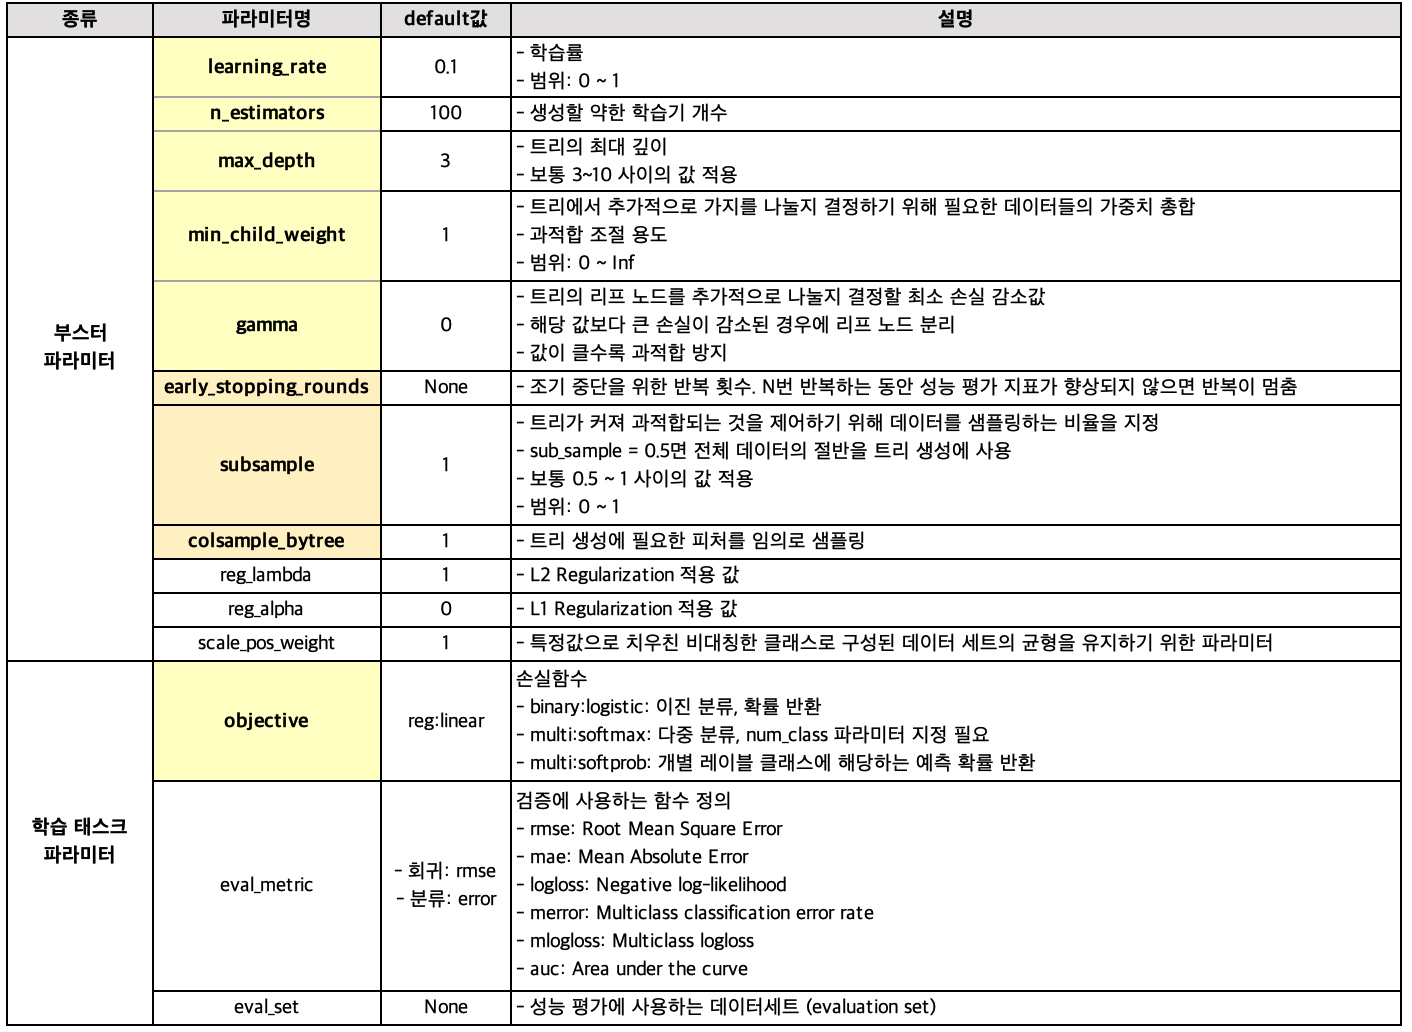

과적합 문제가 심각하면 다음과 같이 하이퍼 파라미터를 조정할 수 있습니다.

- learning_rate을 낮추고 n_estimators를 높여줍니다. (이 둘은 같이 움직입니다)
- max_depth 값을 낮춥니다.
- min_child_weight 값을 높입니다.
- gamma 값을 높입니다.
- subsample, colsample_bytree 값을 조정합니다.

(https://assaeunji.github.io/ml/2021-01-07-xgboost/)

lightGBM 파라미터

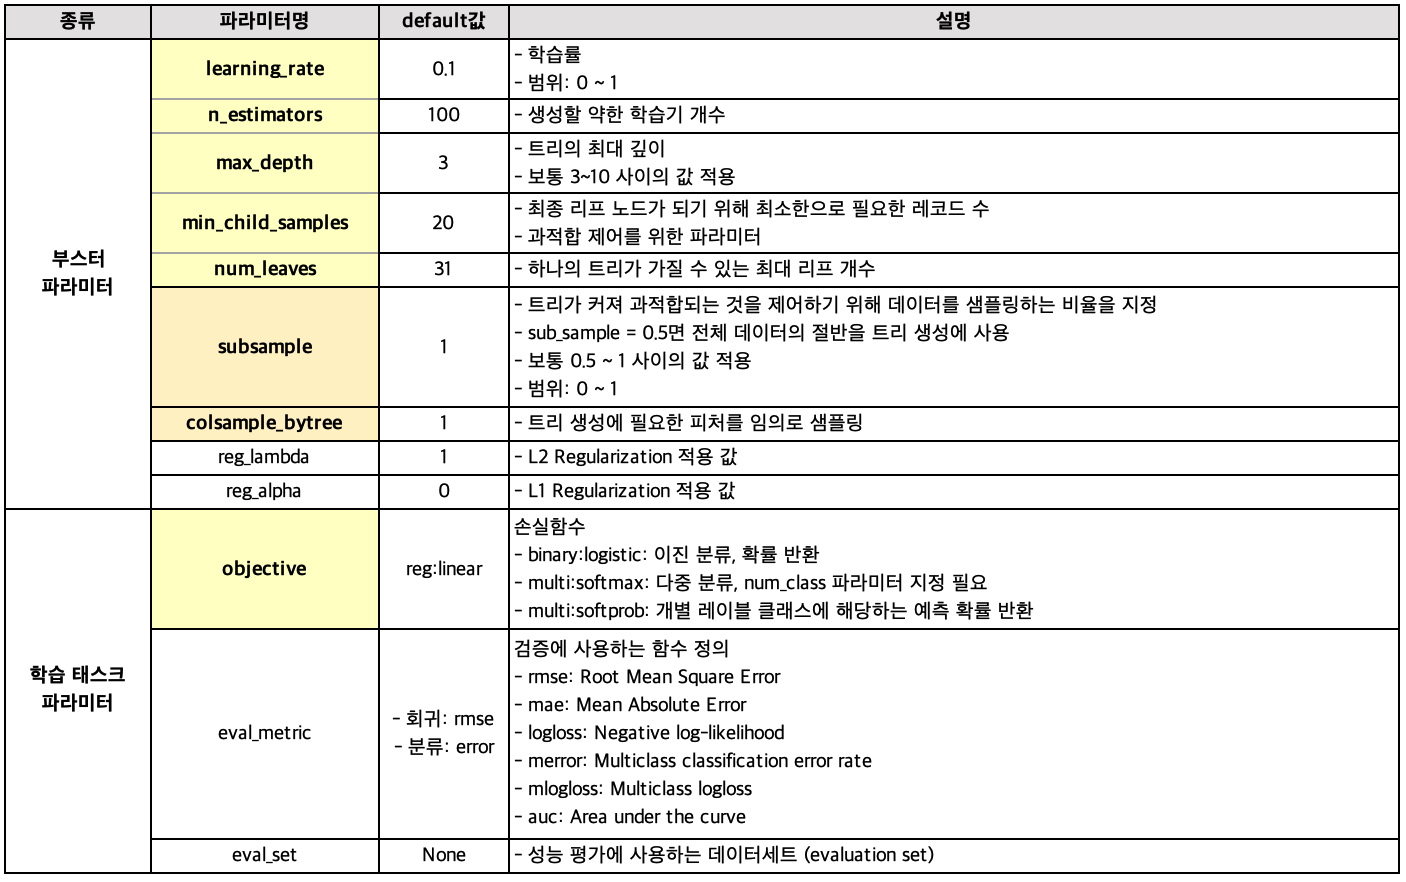

과적합 방지를 위한 하이퍼 파라미터 튜닝 방안은 다음과 같습니다.

- learning_rate를 작게 하면서 n_estimators를 크게 해봅니다.
- min_child_sample는 과적합 개선을 위한 중요한 파라미터입니다. 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지할 수 있습니다.
- max_depth는 명시적으로 트리의 깊이를 제한합니다.

In [9]:
import xgboost
xgb_clf=xgboost.XGBClassifier(n_estimators=100,max_depth=3,random_state=42,eval_metrix='logloss')
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred)

[19:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_metrix } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.872

## SVM (Support Vector Machine)
결정 경계(Decision Boundary),즉 분류를 위한 기준선을 정의하는 모델 (분류되지 않은 새로운 점이 나타나면 경계의 어느쪽에 속하는지 확인해 분류 과제를 수행할 수 있게 됨)   
속도 빠르다> SVM에서는 결정 경계를 정의하는 게 결국 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 쓸 데 없는 수많은 데이터 포인트들을 무시할 수 있기 때문
- **최적의 결정 경계(Decision Boundary)**
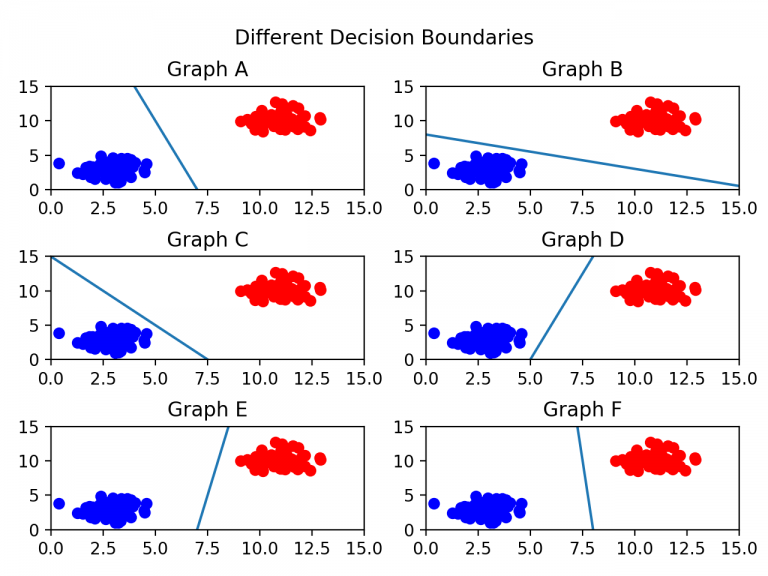
>**결정경계는 데이터군으로부터 최대한 멀리 떨어지는 것이 좋다.**
>>F 가 가장 적당해 보인다 (나머지는 너무 한쪽에 가깝게 분포)
- **margin(마진) : 결정 경계와 서포트벡터 사이의 거리**
    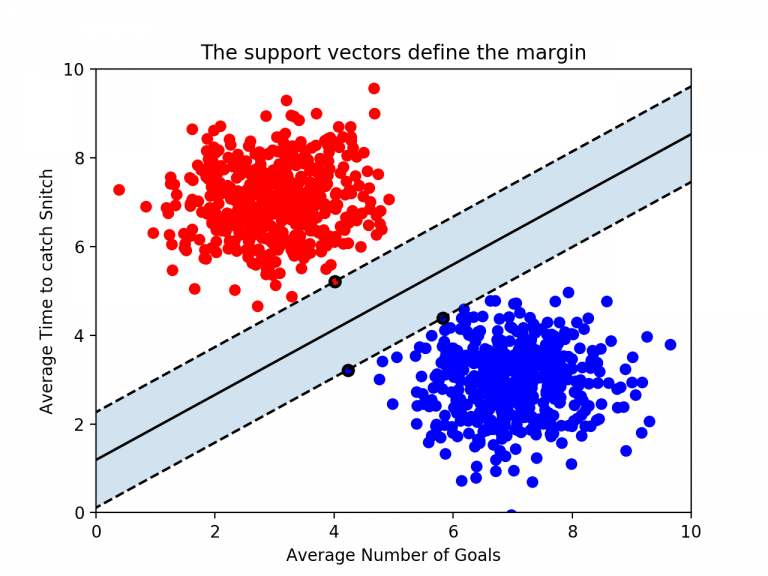
    - 최적의 결정 경계는 마진을 최대화한다.
        - 가운데 실선:결정 경계  
        - 점선으로부터 결정 경계까지의 거리:마진


- **이상치 허용(outlier) 파라미터 C 사용**
    - 하드 마진(hard margin)(위) : 아웃라이어를 허용하지 않고 기준을 까다롭게 세운 모양. 서포트 벡터와 결정 경계 사이의 거리가 매우 좁다. 즉, 마진이 매우 작아진다.  >> overfitting 문제 생길 수 있음
    - 소프트 마진(soft margin)(아래) : 아웃라이어들이 마진 안에 어느정도 포함되도록 너그럽게 기준을 잡은 모양. 서포트 벡터와 결정 경계 사이의 거리가 멀어졌다. 즉, 마진이 커진다. >>underfitting 문제 발생 가능
    - 파라미터 C : 모델이 오류를 어느정도 허용할 것인지 지정. 클수록 하드마진, 작을스록 소프트마진 (default=1)
    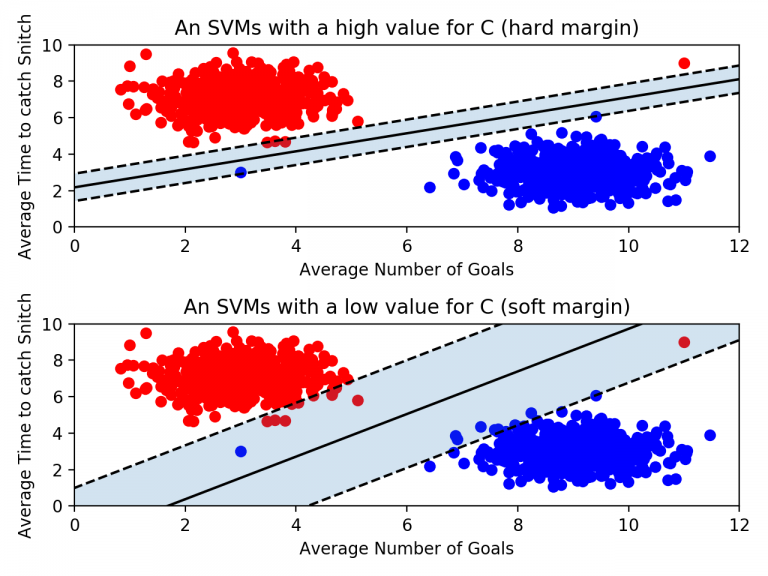
    
- **kernel(커널)** 
    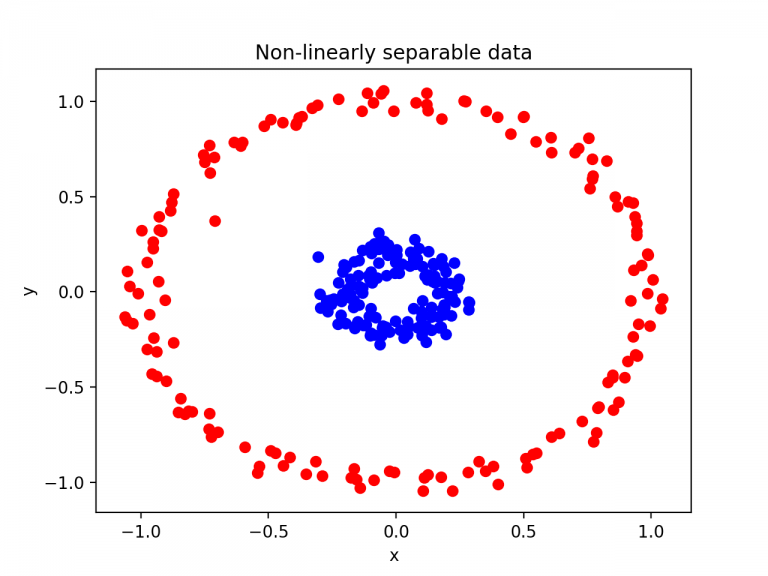
    - kernel 파라미터에 선형 사용 > 'linear' : 선형
    - kernel 파라미터에 다항식(polynomial) 사용 >'poly' : 다항식(polynomial) 커널을 사용하면 데이터를 더 높은 차원으로 변형하여 나타냄으로써 초평면(hyperplane)의 결정 경계를 얻을 수 있다.
    - kernel 파라미터에 방사기저함수(RBF:Radial Bias Function) 사용 >'rgf' :  RBF 커널은 2차원의 점을 무한한 차원의 점으로 변환한다
    
- **gamma(감마)**
    결정경계를 얼마나 유연하게 그을것인지 설정
    - 높일경우 : 학습데이터에 많이 의존하여 결정경계를 구불구불 그음 > 오버피팅 초래 가능
    - 낮출경우 : 데이터에 의존 줄어들며 결정경계를 직선에 가깝게 그음 > 언더피팅 초래 가능
    - 적당
    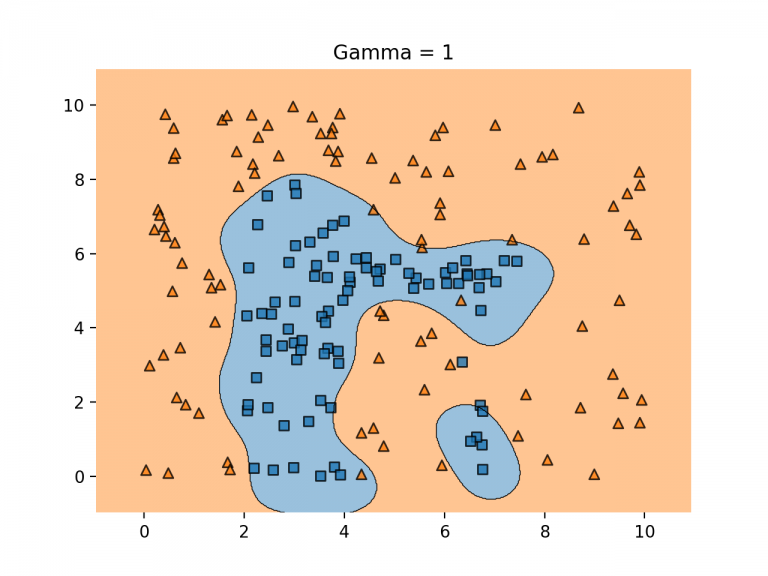
    - 과적합
    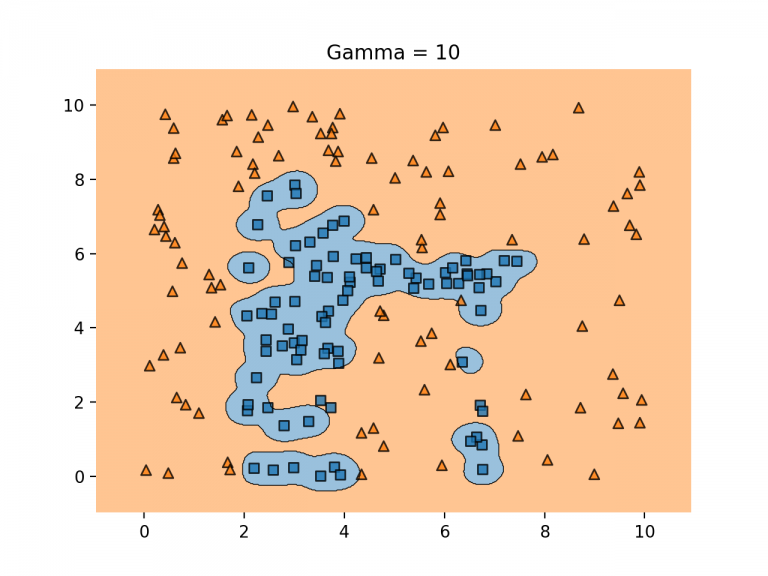
    - 과소적합
    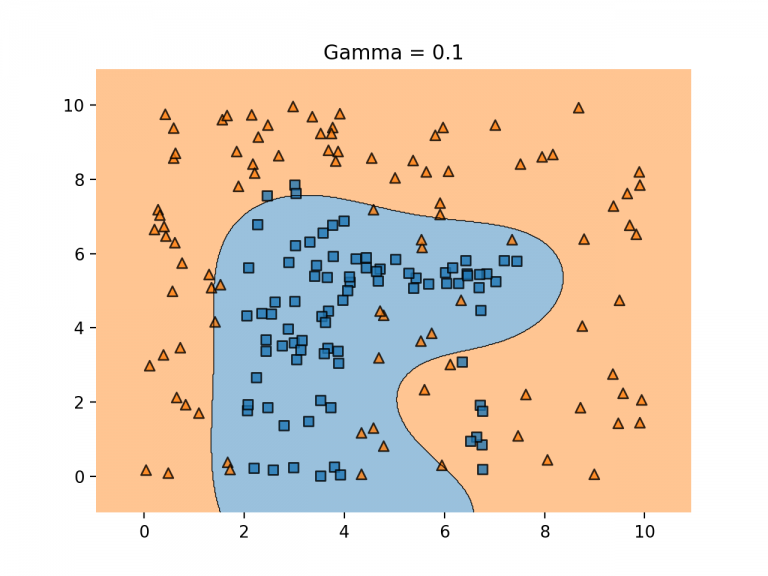

(http://hleecaster.com/ml-svm-concept/)

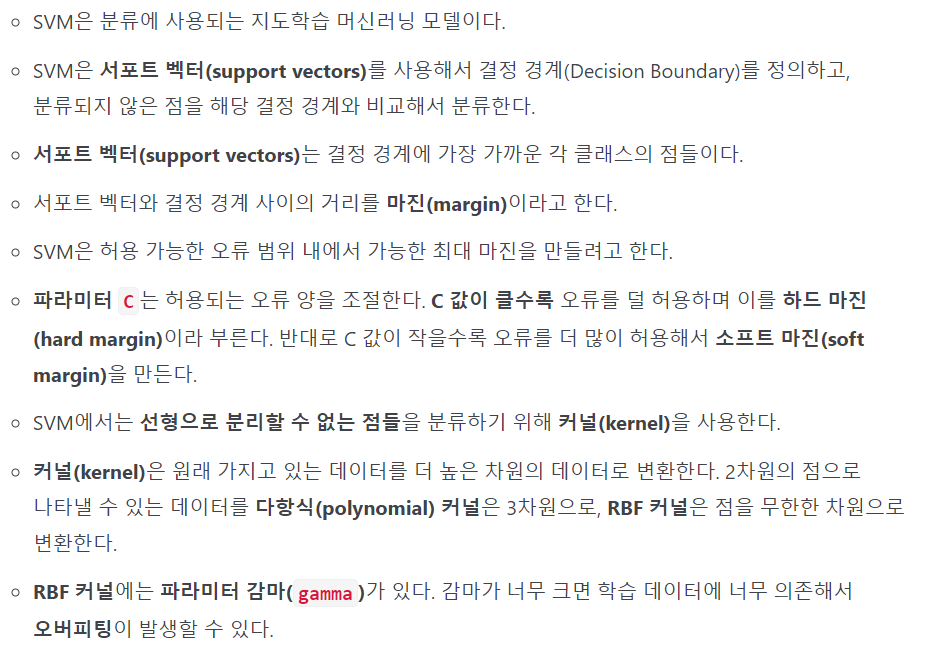

Text(0, 0.5, '특성 1')

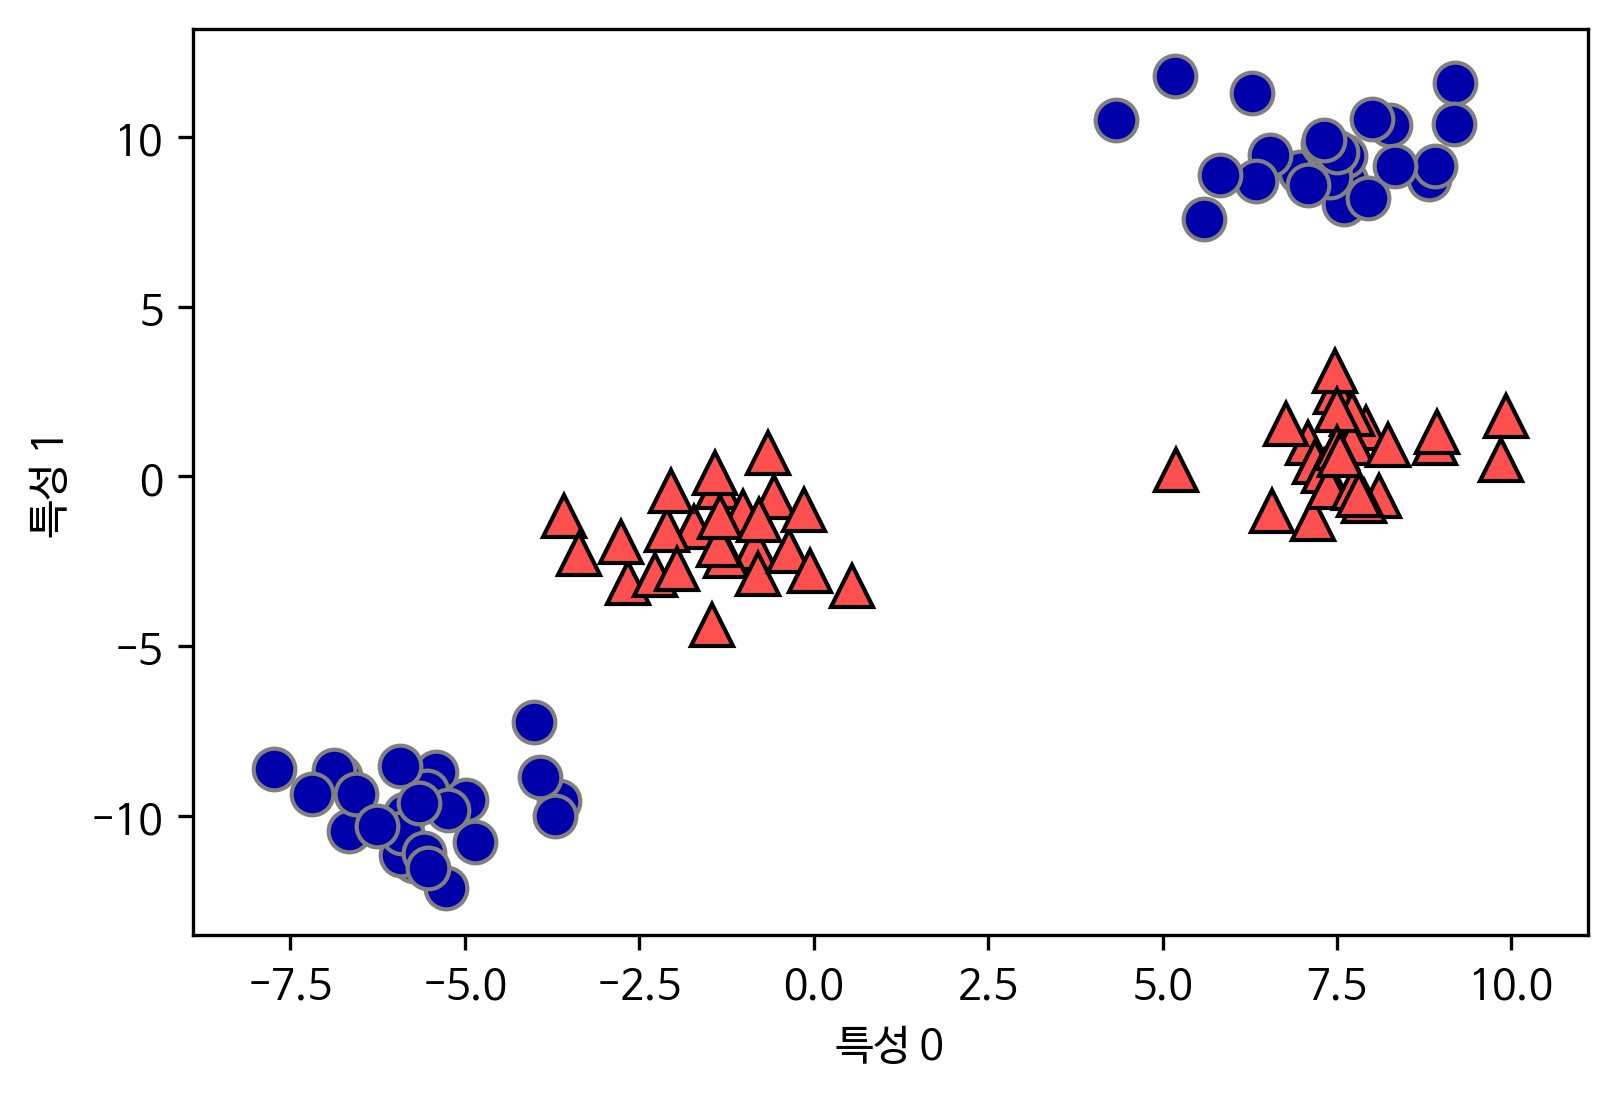

In [10]:
from sklearn.datasets import make_blobs

X,y=make_blobs(centers=4,random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어 이런 데이터셋에는 잘 맞지 않음

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

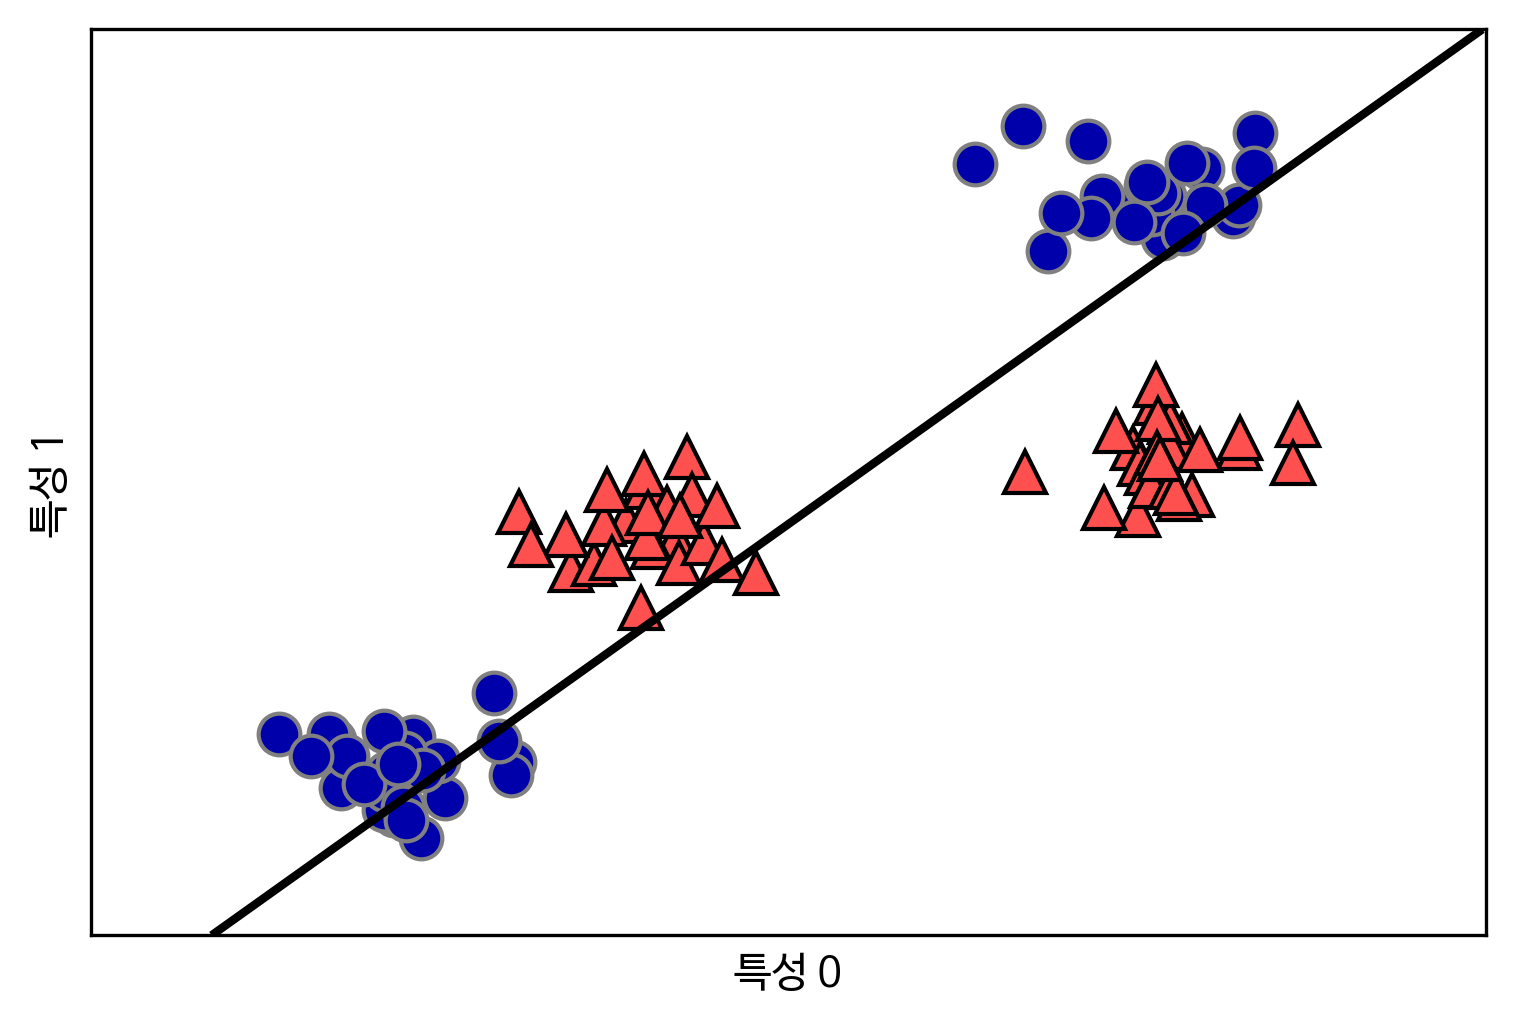

In [11]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성 2')

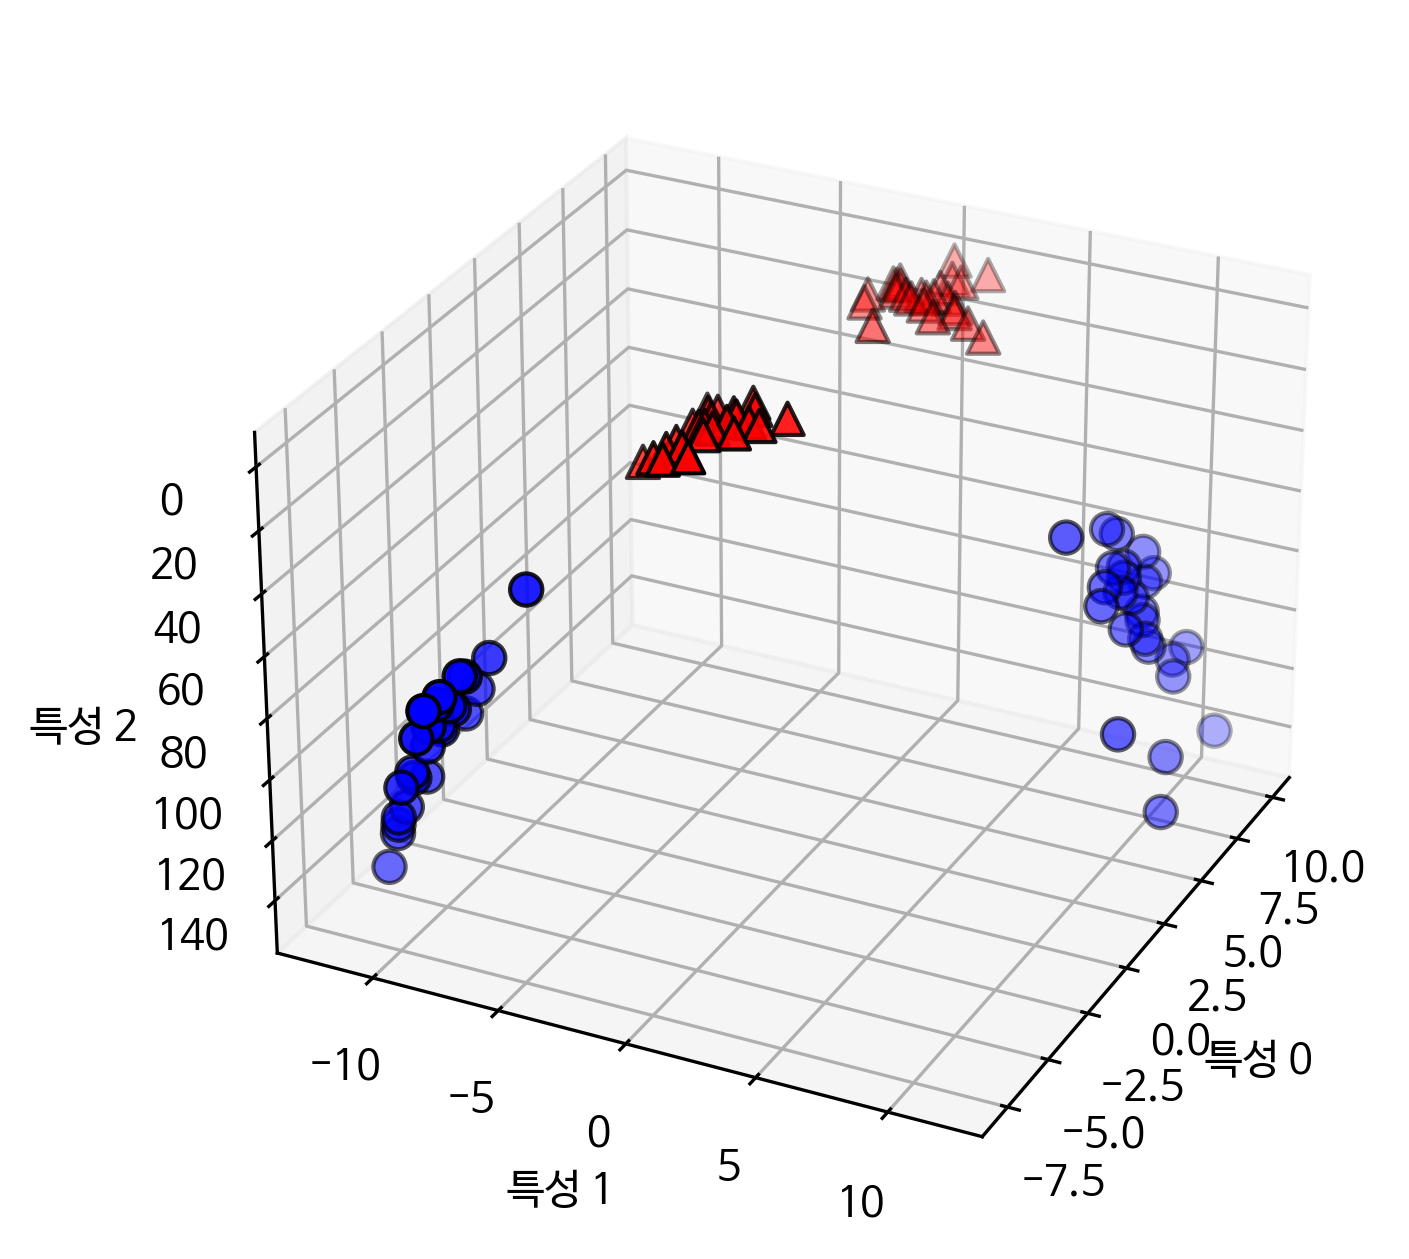

In [12]:
#3차원 데이터 셋으로 표현 > 두 번째 특성을 제곱하여 추가

X_new=np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D,axes3d

figure=plt.figure()
#3차원 그래프
ax=Axes3D(figure,elev=-152,azim=-26)
#y==0인 포인트를 먼저 그린 후 그 다음 y==1인 포인트 그림
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 2")

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성 1**2')

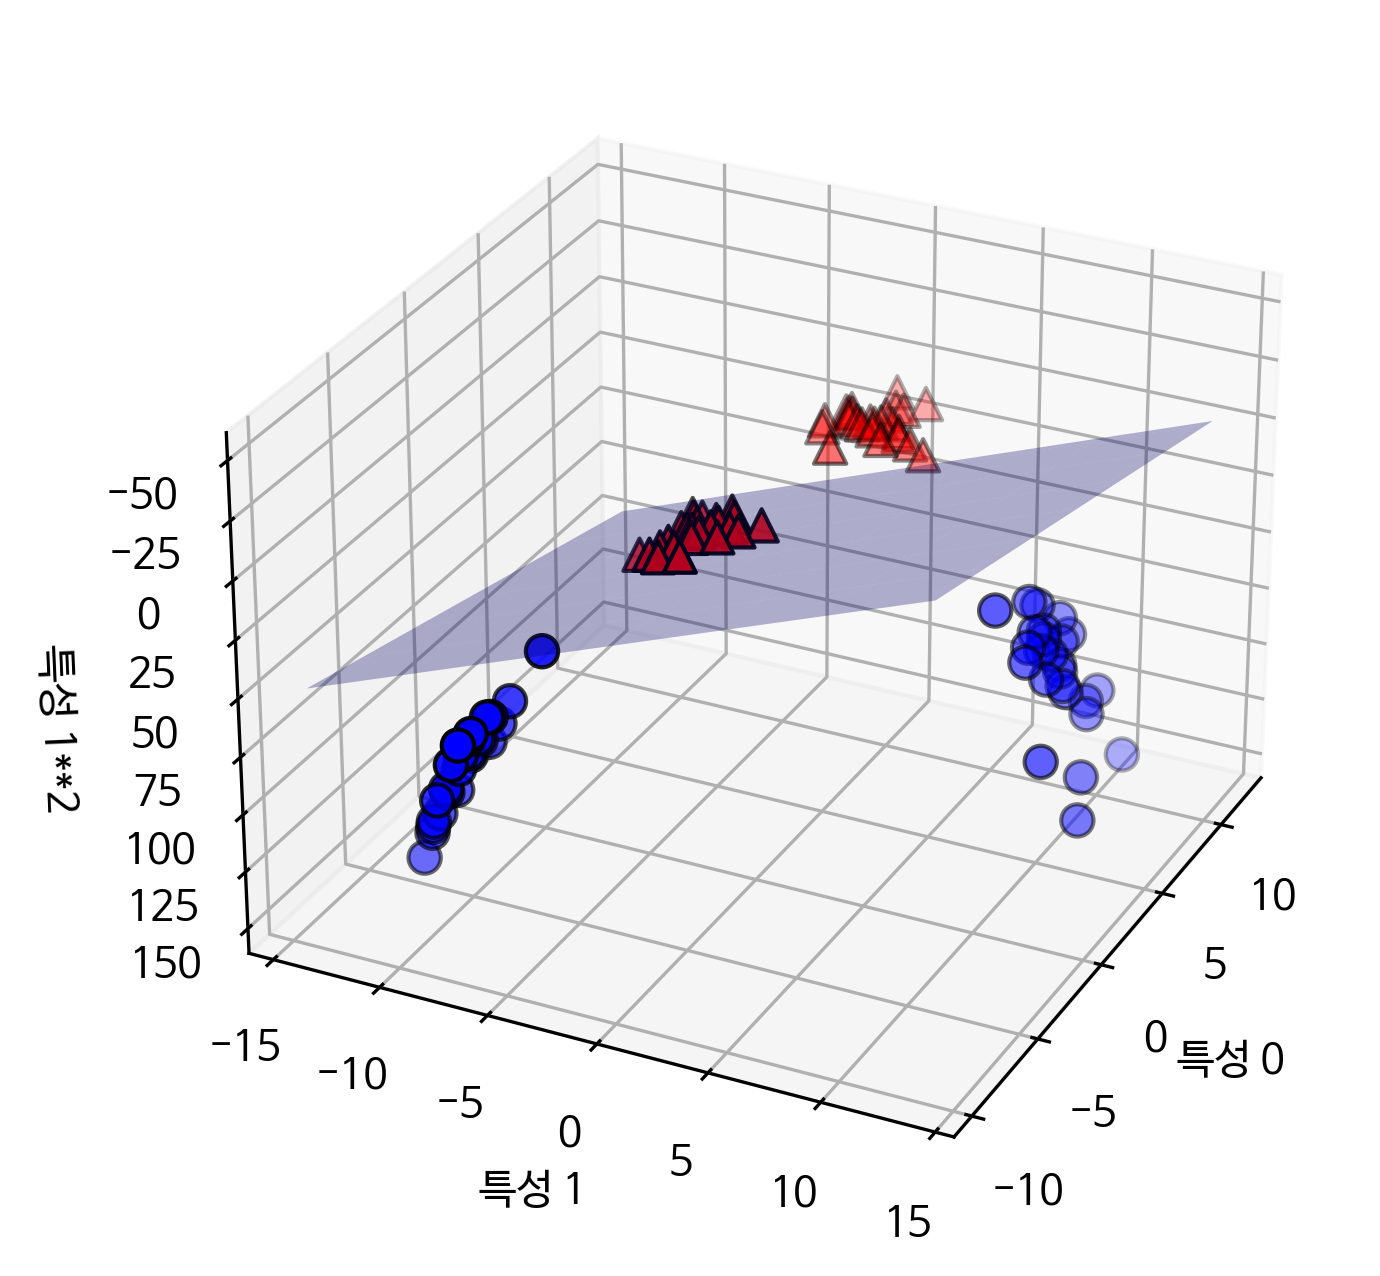

In [13]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
#선형 결정 경계 그리기
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")

선형 SVM모델이 선형이 아닌 타원에 유사한 모형임을 확인 가능

Text(0.5, 0, '특성 0')

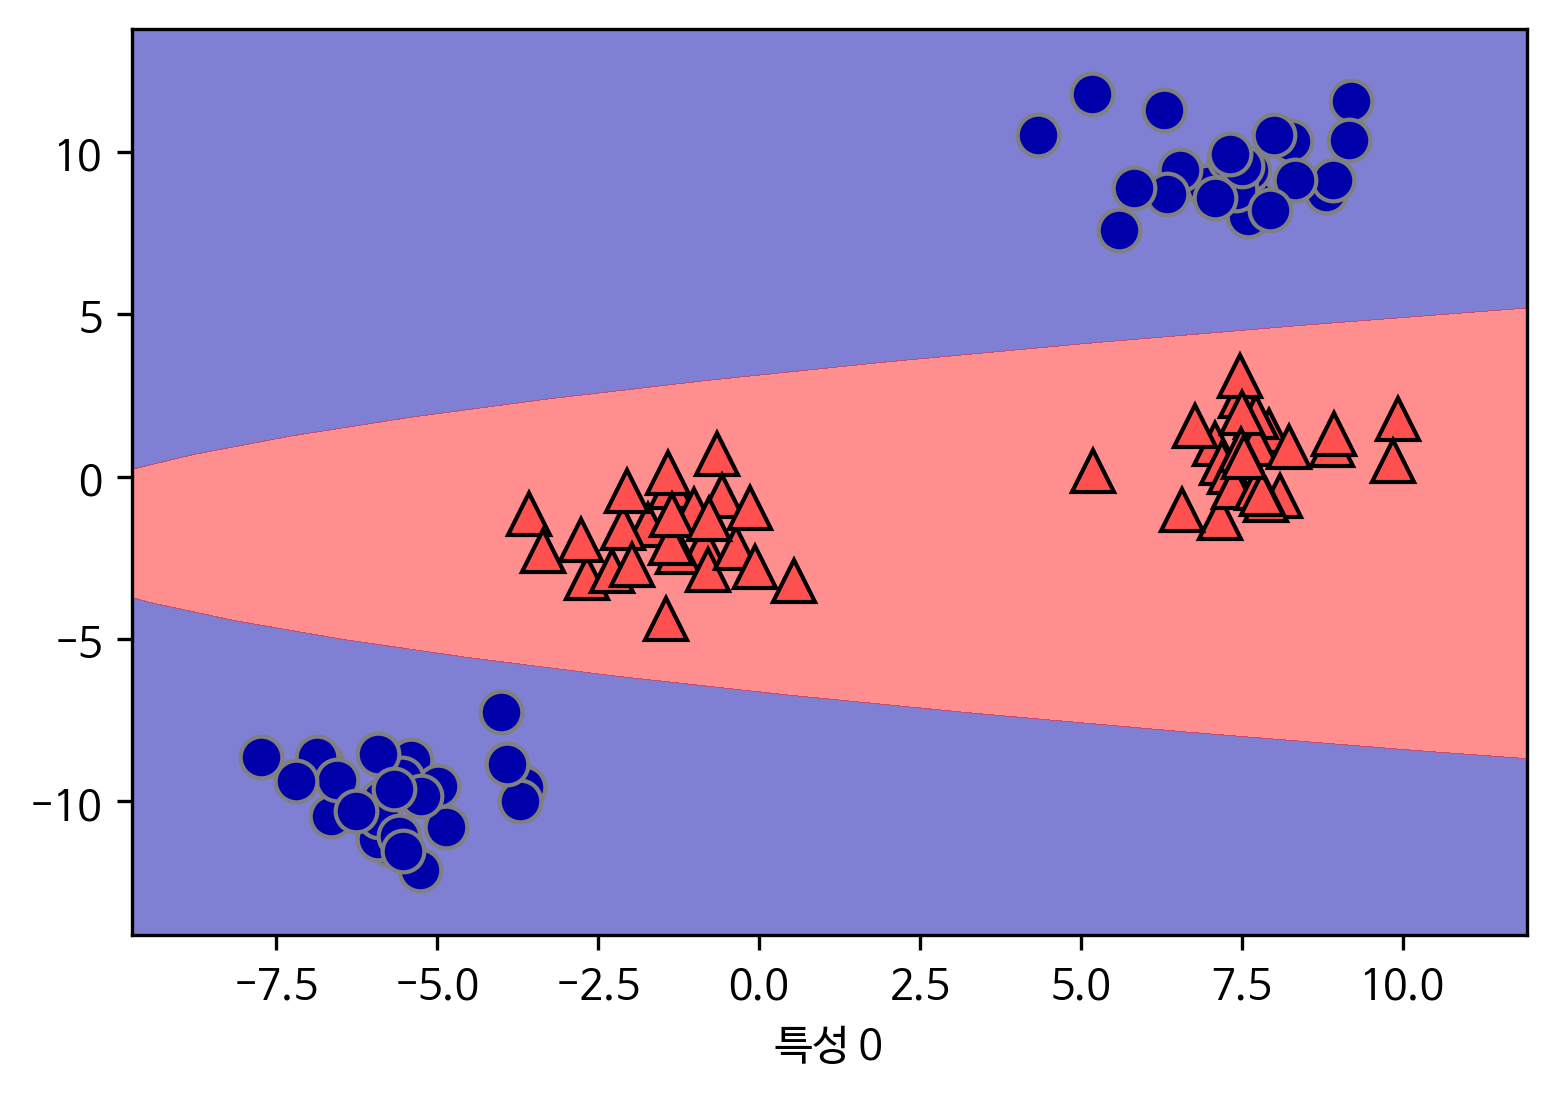

In [14]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")

커널 기법 : 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있음 > 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라곱)를 계산

서포트 벡터: 두 클래스 사이의 경계에 위치한 데이터 포인트들

- 결정 경계 : 검정 실선
- 서포트 벡터: 굵은 테두리

Text(0, 0.5, '특성 1')

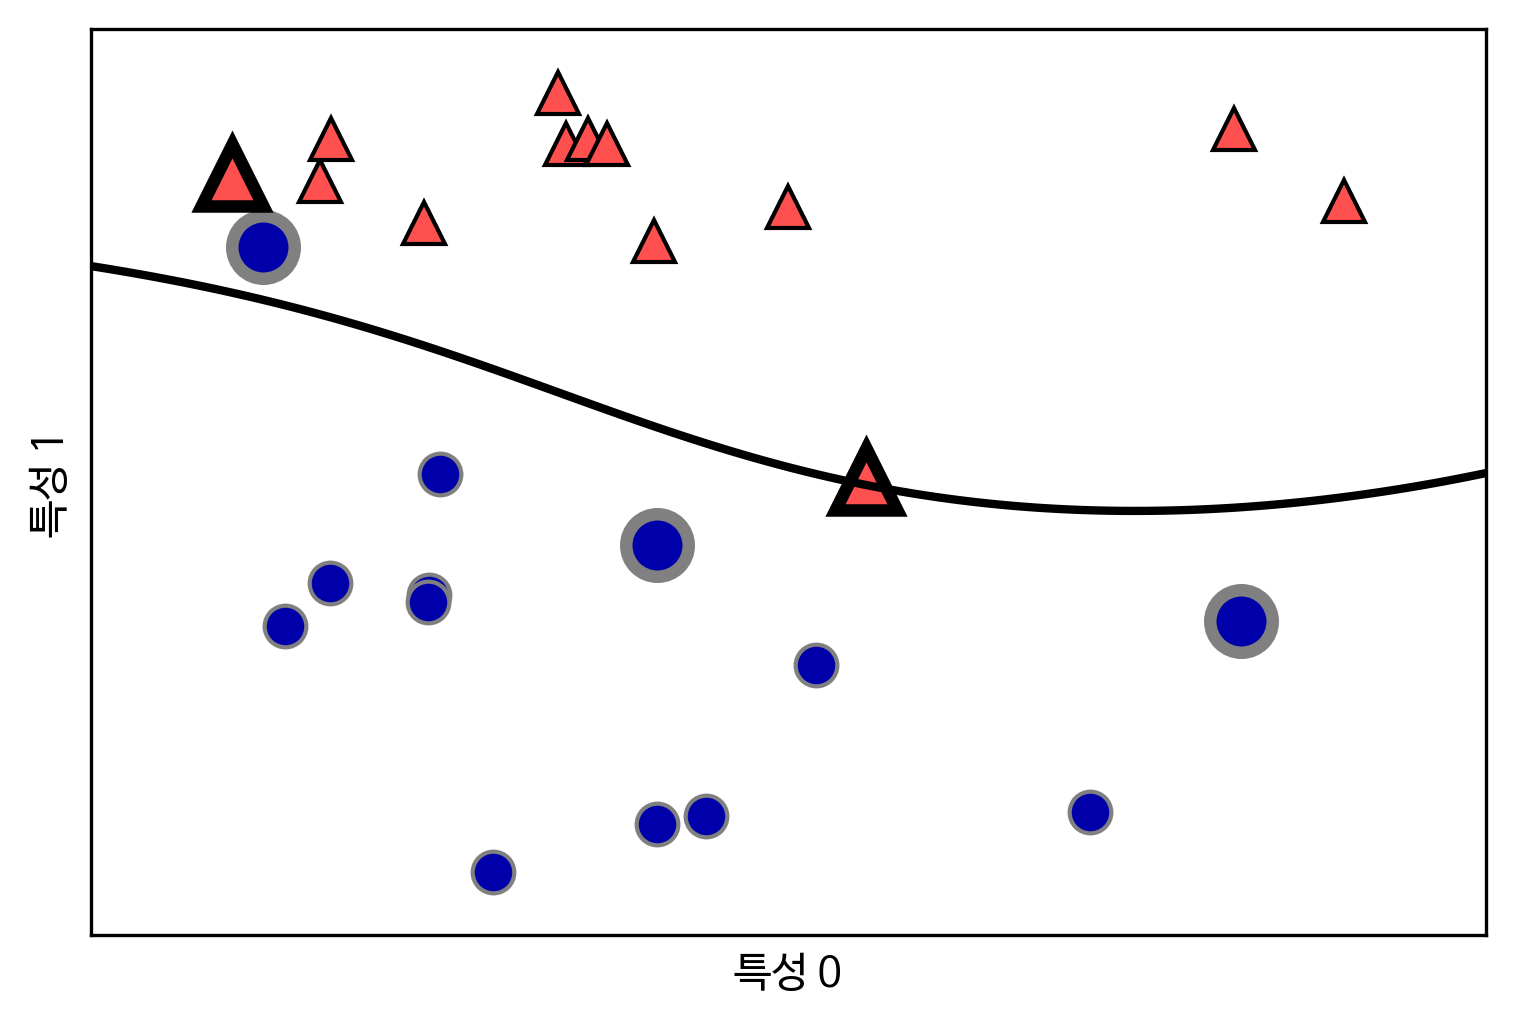

In [15]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
#데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#서포트 벡터
sv=svm.support_vectors_
#dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블 결정됨에 의해 서포트 벡터의 클래스 레이블 결정됨
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
    
axes[0,0].legend(["클래스 0","클래스 1","클래스 0 서포트 벡터","클래스 1 서포트벡터"],ncol=4,loc=(.9,1.2))

감마와 C에 따른 차이 확인 가능

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

svc=SVC()
svc.fit(X_train,y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트에는 90% 정확도를 냈지만 테스트 세트에는 94% 정확도라서 이 모델은 상당히 과소적합되었음

In [ ]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

boxplot은 x,yticks 존재하지않음, ticks 사용! > 눈금! True인 경우 특성목록의 눈금이 전부 출력됨

In [ ]:
plt.boxplot(X_train, manage_ticks=True)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

SVM은 매개변수 설정과 데이터 스케일에 매우 민감하기 때문에 (특히 입력 특성의 범위가 비슷해야함)  
하지만 해당 자료는 자릿수 자체가 완전히 다르기 때문에 커널 SVM에는 큰 문제가 생길 수 있다.  

**전처리**필요!
- 모든 특성값을 평균이 0이고 단위 분산이 되도록 한다
- 또는 0과 1 사이로 맞춘다  

데이터 셋에 따라 어떤 전처리 방법이 좋은 선택인가는 다름

In [ ]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training=X_train.min(axis=0)
#훈련 세트에서 특성별 범위(최대-최소)계산
range_on_training=(X_train-min_on_training).max(axis=0)

#훈련데이터에 최솟값을 빼고 범위로 나누면 전처리 됨 (각 특성에 대해 최솟값0 최댓값1)
X_train_scaled=(X_train-min_on_training)/range_on_training
print("특성별 최솟값\n",X_train_scaled.min(axis=0))
print("특성별 최솟값\n",X_train_scaled.max(axis=0))

In [ ]:
# 테스트 세트에도 같은 작업 적용하나 훈련 세트에서 계산한 최솟값과 범위를 사용 (3장 참고)
X_test_scaled=(X_test-min_on_training)/range_on_training

In [ ]:
svc=SVC()
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled,y_test)))

전처리를 통해 값이 정확도가 좋아짐을 확인할 수 있다.

### 확인해보기

In [ ]:
svc=SVC(C=20)
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled,y_test)))

C 값을 증가시켰더니 모델의 성능이 97.9%로 향상 (책 오류 C=1000을 20으로 변경)

#### 장점
- 다양한 데이터셋에서 잘 작동함
- 데이터의 특성이 몇개 안되더라도 복잡한 결정 경계 만들 수 있음

#### 단점
- 저차원&고차원 데이터(특성이 적&많을때) 모두 잘 작동하나 샘플 많을 때는 잘 맞지 않음
- 데이터 전처리와 매개변수 설정에 신경을 많이 써야함
- 모델 분석이 어려움

**모든 특성이 비슷한 단위이고 스케일이 비슷하면 SVM 시도 괜찮**
- C와 감마 조절이 중요함

## 신경망(딥러닝)

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

신경망 모델 (로지스틱 회귀 모델) 보여줌
- 왼쪽 노드 : 입력 특성
- 연결선 : 학습된 계수 표현
- 오른쪽 노드 : 입력의 가중치 합 (출력)

## MLP(다층 퍼셉트론)
가중치 합을 만드는 과정이 여러번 반복 됨  
먼저 중간 단계 구성하는 hidden layer(은닉층) 계산 후 이를 이용해 최종 결과 산출위해 다시 가중치 합 계산

각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 렐루rectified linear unit, ReLU나 하이퍼볼릭 탄젠트hyperbolic tangent, tanh를 적용해 선형모델보다 강력하게 만듦

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

은닉층 2개

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

 하이퍼볼릭 탄젠트 활성화 함수와 렐루 활성화 함수

In [ ]:
# two_moons 데이터셋에 분류를 위한 다층 퍼셉트론(MLP) 구현인 MLPClassifier를 적용

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

비선형적이지만 비교적 매끄러운 결정 경계를 만듦

In [ ]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

은닉 유닛이 10개인 신경망으로 학습시킨 two_moons 데이터셋의 결정 경계
(결정 경계가 날카로워짐)기본 비선형 함수>ReLU  

더욱 매끈하게 하려면 하기 방법 중 사용
- 은닉 유닛 추가
- 은닉층 추가
- tanh함수 사용

In [ ]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

10개의 은닉 유닛 가진 은닉층 2개 생성

In [ ]:
mlp=MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

은닉 유닛 10개인 은닉층 2개, tanh 함수 사용

In [ ]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))

L2 페널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어 가능 > 파라미터 alpha 사용 

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

초깃값 무작위로 하고 같은 파라미터로 학습

In [ ]:
print("유방암 데이터의 특성별 최댓값:\n",cancer.data.max(axis=0))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("훈련 세트 정확도:{:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도:{:.2f}".format(mlp.score(X_test,y_test)))

전처리 하는 것이 좋음

In [ ]:
#훈련 세트 각 특성의 평균 계산
mean_on_train=X_train.mean(axis=0)
#훈련 세트 각 특성의 표준 편차 계산
std_on_train=X_train.std(axis=0)

#데이터에서 평균 빼고 표준 편차로 나누면 평균=0, 표준편차=1인 데이터로 변환됨
X_train_scaled=(X_train-mean_on_train)/std_on_train
#테스트 세트에도 변환
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

결과 좋아졌으나 최대 반복 횟수에 도달했음을 확인 가능> 학습시키는 adam 알고리즘에 관련한 것으로 경고 확인 시 반복횟수를 늘려줘야함

In [ ]:
mlp=MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

반복 횟수를 올려줬음을 확인 가능 (max_iter 사용)  
성능 올렸으나(위) 일반화 성능을 올리기 위해 모델 복잡도 낮춤(밑) (alpha 파라미터 > 가중치 규제 사용)

In [ ]:
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)
#alpha를 0.0001에서 1로 증가시킴
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

입력과 은닉층 사이의 학습된 가중치 보여줌  
- 밝은 색 큰 양수 값
- 어두운 색 음수 값

#### 장점
- 대량의 데이터에 내재된 정보 잡아낼 수 있음
- 복잡한 모델 만들 수 있음
- 충분한 시간과 데이터와 파라미터 조정을 통해 좋은 성능 얻을 수 있음

#### 단점
- 학습이 오래 걸림
- 전처리에 유의해야함
- 다른 종류의 특성을 가진 데이터라면 트리 기반 모델이 나을 수 있음

### 다중 분류에서의 불확실성

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42)
gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

print("결정 함수의 결과 형태:{}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6,:]))
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("예측:\n{}".format(gbrt.predict(X_test)))